# Dataset: Spam email dataset
### KNN: classify emails based on word counts and features 
### Decision Tree: build a tree to classify emails or predict house prices 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("mail.csv", encoding="windows-1252")

print("Shape:", df.shape)
print(df.head())


Shape: (5572, 5)
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [3]:
# Keep only useful columns
df = df[["v1", "v2"]]


In [4]:
# Rename columns
df.columns = ["label", "text"]

In [5]:
# Convert labels to numbers: ham=0, spam=1
df["label"] = df["label"].map({"ham": 0, "spam": 1})

print(df.head())
print(df["label"].value_counts())

   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...
label
0    4825
1     747
Name: count, dtype: int64


# tarin

In [6]:
X = df["text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Train shape:", X_train_vec.shape)
print("Test shape:", X_test_vec.shape)

Train shape: (4457, 5000)
Test shape: (1115, 5000)


# KNN

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_vec, y_train)

y_pred_knn = knn.predict(X_test_vec)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report (KNN):\n")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9183856502242153

Classification Report (KNN):

              precision    recall  f1-score   support

           0       0.91      1.00      0.96       966
           1       1.00      0.39      0.56       149

    accuracy                           0.92      1115
   macro avg       0.96      0.69      0.76      1115
weighted avg       0.93      0.92      0.90      1115



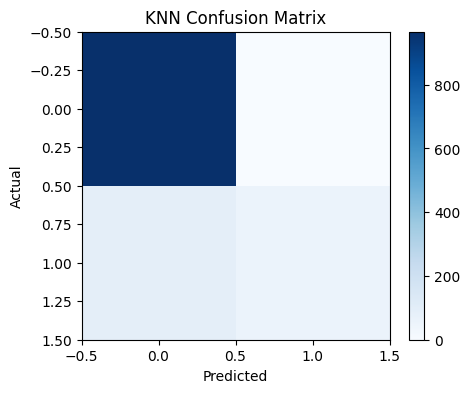

Confusion Matrix:
 [[966   0]
 [ 91  58]]


In [9]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5,4))
plt.imshow(cm_knn, cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

print("Confusion Matrix:\n", cm_knn)

# DECISION TREE CLASSIFIER

In [10]:
dt = DecisionTreeClassifier(max_depth=15, random_state=42)

dt.fit(X_train_vec, y_train)

y_pred_dt = dt.predict(X_test_vec)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):\n")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9515695067264573

Classification Report (Decision Tree):

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       966
           1       0.91      0.71      0.80       149

    accuracy                           0.95      1115
   macro avg       0.93      0.85      0.88      1115
weighted avg       0.95      0.95      0.95      1115



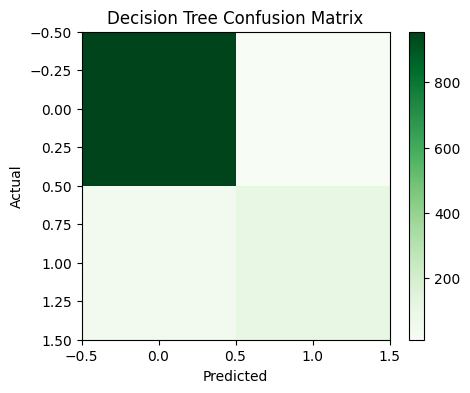

Confusion Matrix:
 [[955  11]
 [ 43 106]]


In [11]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(5,4))
plt.imshow(cm_dt, cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

print("Confusion Matrix:\n", cm_dt)

# Predict Spam for New Messages

In [12]:
def predict_message(msg, model):
    msg_vec = vectorizer.transform([msg])
    pred = model.predict(msg_vec)[0]
    return "SPAM" if pred == 1 else "HAM"

sample1 = "Congratulations! You won a free iPhone. Click here to claim."
sample2 = "Hey bro, are we meeting at 6pm today?"

print("KNN:", predict_message(sample1, knn))
print("KNN:", predict_message(sample2, knn))

print("Decision Tree:", predict_message(sample1, dt))
print("Decision Tree:", predict_message(sample2, dt))


KNN: HAM
KNN: HAM
Decision Tree: SPAM
Decision Tree: HAM


# VS

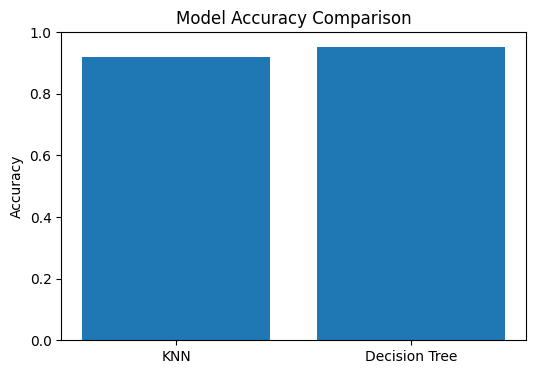

KNN Accuracy: 0.9183856502242153
Decision Tree Accuracy: 0.9515695067264573


In [13]:
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_dt = accuracy_score(y_test, y_pred_dt)

models = ["KNN", "Decision Tree"]
accs = [acc_knn, acc_dt]

plt.figure(figsize=(6,4))
plt.bar(models, accs)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

print("KNN Accuracy:", acc_knn)
print("Decision Tree Accuracy:", acc_dt)
